Random forest
* max depth
* n_estimators

In [8]:
##importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
#importamos los datos
dfx = pd.DataFrame(load_boston().data, columns=(load_boston()).feature_names)
dfy = pd.DataFrame(load_boston().target)

In [4]:
#Organizamos los datos
X=dfx.iloc[:,5]
X = X[:, np.newaxis]
Y= dfy.iloc[:,0]
Y = Y[:, np.newaxis]
print("Dimensiones en X: {}".format(str(X.shape)))
print("Dimension en Y: {}".format(str(Y.shape)))

Dimensiones en X: (506, 1)
Dimension en Y: (506, 1)


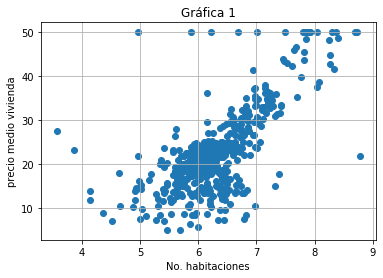

In [5]:
plt.scatter(X,Y)
plt.title("Gráfica 1")
plt.xlabel("No. habitaciones")
plt.ylabel("precio medio vivienda")
plt.grid()
plt.show()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3, random_state=4)

In [49]:
bosques_aleatorios = RandomForestRegressor(n_estimators = 100, max_depth = 8)
bosques_aleatorios.fit(X_train, Y_train)

C:\Users\RUBIOAPARICIO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

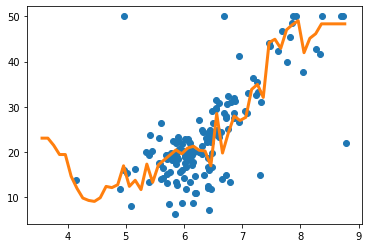

In [52]:
#Graficamos los datos de prueba junto con la predicción
X_grafica = np.arange(min(X), max(X), 0.1)
X_grafica = X_grafica.reshape((len(X_grafica), 1))
plt.scatter(X_test, Y_test)

plt.plot(X_grafica, bosques_aleatorios.predict(X_grafica), color='#ff7f0e', linewidth=3)
plt.show()

In [57]:
Y_pred= bosques_aleatorios.predict(X_test)
print('Resultado del entrenamiento = {}'.format(bosques_aleatorios.score(X_train,Y_train)))
print('Resultado con los datos de prueba = {}'.format(bosques_aleatorios.score(X_test,Y_test)))

Resultado del entrenamiento = 0.7839021758223388
Resultado con los datos de prueba = 0.5524812625230822
